# Speed statistics from traffic cameras
In order to look a closer look at the speeds as observed by traffic cameras, I looked at the public dataset provided by the NYCDOT's Traffic Management Center. This data is downloaded from https://data.cityofnewyork.us/Transportation/Real-Time-Traffic-Speed-Data/qkm5-nuaq. This is a fairly large dataset with millions of datapoints. They also provide geographical data with which we can get maps of speeding as well. We will read in the data and plot out the observed speed values based on the latitudes and longitudes of the speeds. We consider speeds of over 65 mph for plotting. 

In [7]:
speeddf = pd.read_csv('DOT_Traffic_Speeds_NBE.csv', index_col=False, header=0)
speeddf2 = speeddf.dropna()
print(speeddf2.head(3))



    ID  SPEED  TRAVEL_TIME  STATUS              DATA_AS_OF  LINK_ID  \
0  344  31.69          137       0  05/05/2017 09:49:47 AM  4620330   
1  191  41.01          104       0  05/05/2017 09:49:47 AM  4620331   
2  190  44.12           98       0  05/05/2017 09:49:47 AM  4620332   

                                         LINK_POINTS  \
0  40.85513,-73.91865 40.8526305,-73.920881 40.85...   
1  40.8465405,-73.932021 40.84611,-73.93075 40.84...   
2  40.84671,-73.931941 40.8460306,-73.930181 40.8...   

                                   ENCODED_POLY_LINE ENCODED_POLY_LINE_LVLS  \
0  qojxFpfdbMrN|LlO`NtTtQ~FtClClAv@Ar@k@XkAQsBsAq...        BBBBBBBBBBBBBBB   
1         {yhxFbzfbMtA}FfDyT|@iGZ_F?_Fe@oSk@i]AkUFgF             BBBBBBBBBB   
2            }zhxFryfbMfC_J~BqOlAgIZkFC_Hq@sZ[wb@ToV              BBBBBBBBB   

         OWNER  TRANSCOM_ID BOROUGH  \
0  NYC_DOT_LIC      4620330   Bronx   
1  PA-GWBridge      4620331   Bronx   
2  PA-GWBridge      4620332   Bronx   

                

In [8]:
speedbins = np.linspace(0,185,50)
speeddf2['speedbinned'] = pd.cut(speeddf2['SPEED'], speedbins)
speedbinsviol = speeddf2['speedbinned'].value_counts().sort_index()

speeddf2['new_column'] = speeddf2['LINK_POINTS'].apply(lambda x: x[0:18])
speeddf3 = pd.DataFrame(speeddf2['new_column'].str.split(',',1).tolist(),columns=['Lat','Long'])

speeddf2['Lat'] = speeddf3['Lat']
speeddf2['Long'] = speeddf3['Long']
speeddf4 = speeddf2.loc[speeddf2['SPEED']>65]
lat = pd.to_numeric(speeddf4['Lat'])
lon = pd.to_numeric(speeddf4['Long'])



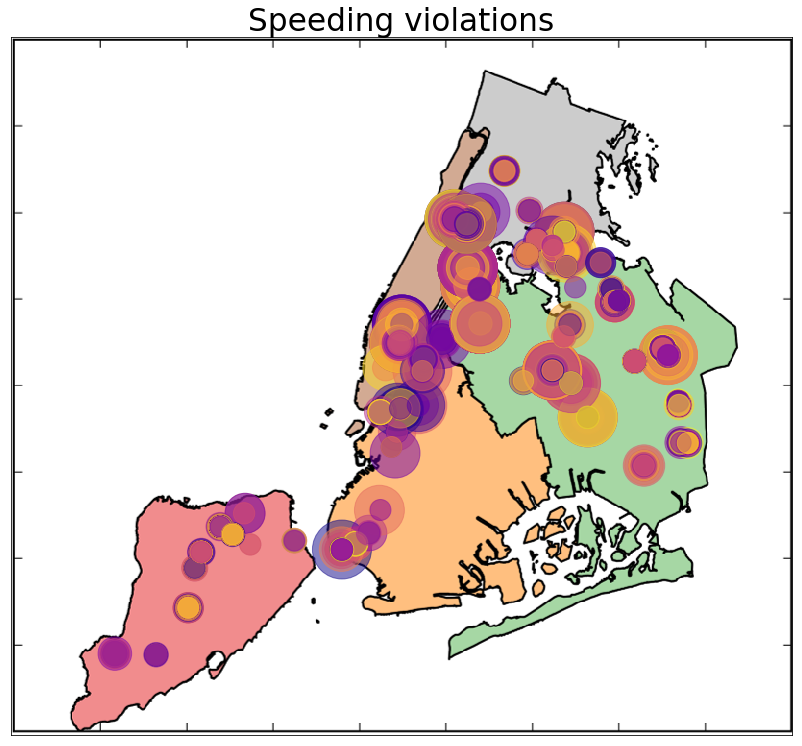

In [11]:
N = speeddf4.__len__()

fig = plt.figure(figsize=(14, 14))
img = plt.imread('nyc_cleaned.png')
ext = [min(lon)-0.1, max(lon)+0.1, min(lat)-0.06, max(lat)+0.1]
plt.imshow(img, zorder=0, extent=ext)

aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))

# implot = plt.imshow(im,zorder=0)
colors = np.random.rand(N)
plt.scatter(lon,lat,s=speeddf4['SPEED']**2/10,c=colors,alpha=0.5,cmap=plasma,zorder=1)

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    labelbottom=False,
    labelleft='off') 

matplotlib.rcParams.update({'font.size': 26})
plt.gca().set_aspect(aspect)
plt.title('Speeding violations')
# plt.ion()
plt.show()
fig.savefig('speedplot.png')

This map gives a distribution of the speeding violations (>65 mph) as measured by the traffic cameras. The sizes of the circles represent the speed. 

# Speeding violations by borough 

Lastly, we will look at the speeding violations as observed in the violation statistics. This would help us compare how the actual speeding data correlates with the ticketed violations. 

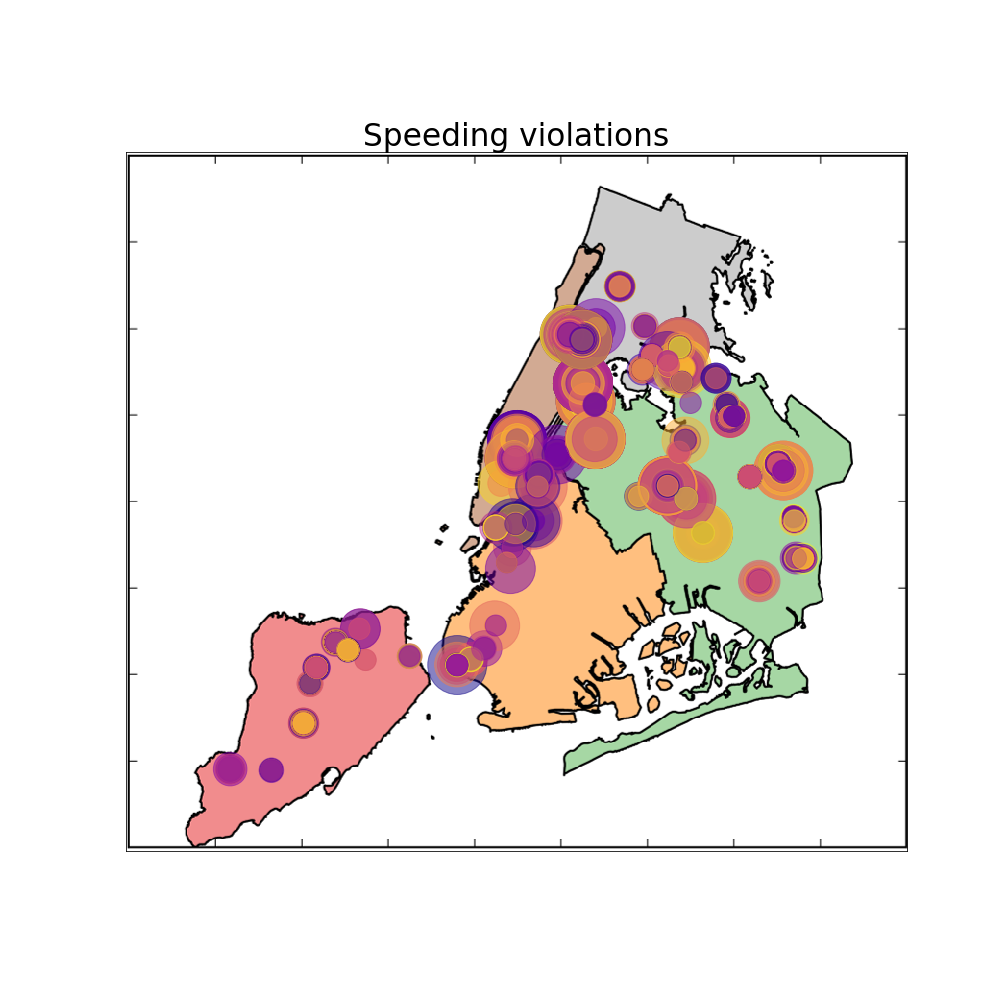

In [12]:
from IPython.display import Image
Image(filename='speedplot.png')